In [1]:
# importing the essential libraries

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Q1) Reading the dataset onto the python environment

In [3]:
data = pd.read_excel(r"C:\Users\sebin\Downloads\iris (3).xls")

In [4]:
# Checking the details of the given dataset

In [5]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.shape

(150, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Q2) Doing the necessary pre processing steps

In [9]:
# checking the number of missing values

In [10]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [11]:
# Filling the missing values using Simple Imputer

In [12]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [13]:
num_cols = data[['SL','SW','PL']]

In [14]:
num_cols.isna().sum()

SL    7
SW    6
PL    6
dtype: int64

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
imputer = SimpleImputer(missing_values=np.nan,strategy='median')
imputer = imputer.fit(num_cols)
num_cols = imputer.transform(num_cols)

In [17]:
type(num_cols)

numpy.ndarray

In [18]:
# Transforming the array into DataFrame

In [19]:
num_cols = pd.DataFrame(num_cols,columns=['SL','SW','PL'])

In [20]:
num_cols.head()

,SL,SW,PL
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,5.8,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


In [21]:
num_cols.isna().sum()

SL    0
SW    0
PL    0
dtype: int64

In [22]:
data.drop(['SL','SW','PL'],axis=1,inplace=True)

In [23]:
data.head()

,PW,Classification
0,0.2,Iris-setosa
1,0.2,Iris-setosa
2,0.2,Iris-setosa
3,0.2,Iris-setosa
4,0.2,Iris-setosa


In [24]:
data = pd.concat([data,num_cols],axis=1)

In [25]:
data.head()

,PW,Classification,SL,SW,PL
0,0.2,Iris-setosa,5.1,3.5,1.4
1,0.2,Iris-setosa,4.9,3.0,1.4
2,0.2,Iris-setosa,5.8,3.2,1.3
3,0.2,Iris-setosa,4.6,3.1,1.5
4,0.2,Iris-setosa,5.0,3.6,1.4


In [26]:
data.isna().sum()

PW                0
Classification    0
SL                0
SW                0
PL                0
dtype: int64

In [27]:
# Checking for outliers

Text(0.5, 1.0, 'PW')

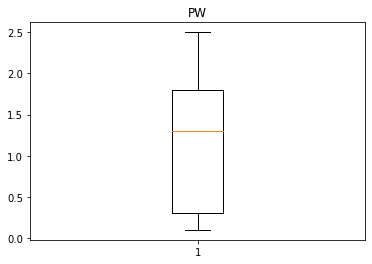

In [28]:
plt.boxplot(data['PW'])
plt.title("PW")

Text(0.5, 1.0, 'PL')

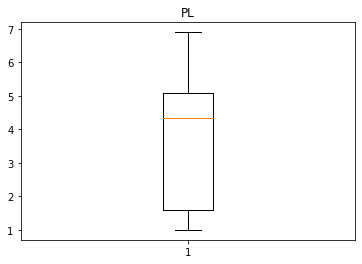

In [29]:
plt.boxplot(data['PL'])
plt.title('PL')

Text(0.5, 1.0, 'SL')

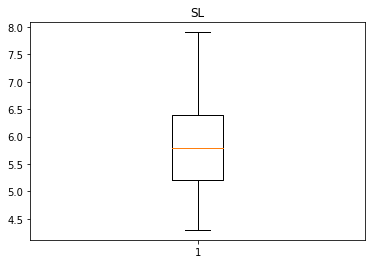

In [30]:
plt.boxplot(data['SL'])
plt.title('SL')

Text(0.5, 1.0, 'SW')

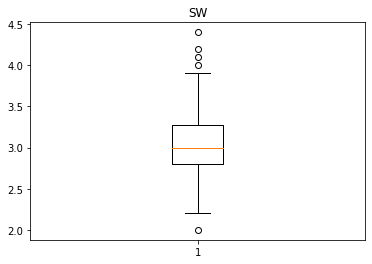

In [31]:
plt.boxplot(data['SW'])
plt.title('SW')

In [32]:
# Handling the outliers present in 'SW' 

In [33]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')

In [34]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [35]:
data['SW'].median()

3.0

In [36]:
IQR = Q3-Q1

In [37]:
IQR

0.4500000000000002

In [38]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [39]:
low_lim

2.1249999999999996

In [40]:
up_lim

3.9250000000000003

In [41]:
outliers=[]

for i in data['SW']:
    if(i>up_lim) or (i<low_lim):
        outliers.append(i)
        

In [42]:
outliers

[4.0, 4.4, 4.1, 4.2, 2.0]

In [43]:
# Locating the index of the outliers and deleting the outliers

In [44]:
ind=data['SW']>up_lim
data.loc[ind].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [45]:
ind=data['SW']<low_lim
data.loc[ind].index

Int64Index([60], dtype='int64')

In [46]:
data = data.drop([14, 15, 32, 33,60])

In [47]:
data.shape

(145, 5)

In [48]:
data['Classification'].nunique()

3

In [49]:
# Using Label Encoding to encode the data

In [50]:
from sklearn import preprocessing

In [51]:
label_encoder = preprocessing.LabelEncoder()

In [52]:
data['Classification'] = label_encoder.fit_transform(data['Classification'])

In [53]:
data.head()

,PW,Classification,SL,SW,PL
0,0.2,0,5.1,3.5,1.4
1,0.2,0,4.9,3.0,1.4
2,0.2,0,5.8,3.2,1.3
3,0.2,0,4.6,3.1,1.5
4,0.2,0,5.0,3.6,1.4


In [54]:
# Creating train and test data's

In [55]:
X = data.drop('Classification',axis=1)
y = data['Classification']

In [56]:
# Applying min max scaling to the dataset

In [57]:
min_max_scaler= preprocessing.MinMaxScaler(feature_range=(0,1))

In [58]:
X = min_max_scaler.fit_transform(X)

In [59]:
type(X)

numpy.ndarray

In [60]:
X = pd.DataFrame(X,columns=['PW','PL','SW','SL'])

In [61]:
X.describe()

,PW,PL,SW,SL
count,145.000000,145.000000,145.000000,145.000000
mean,0.469540,0.435441,0.484381,0.482642
std,0.315925,0.226896,0.220208,0.290214
min,0.000000,0.000000,0.000000,0.000000
25%,0.083333,0.250000,0.352941,0.101695
50%,0.500000,0.416667,0.470588,0.567797
75%,0.708333,0.583333,0.588235,0.694915
max,1.000000,1.000000,1.000000,1.000000


In [62]:
X.head()

,PW,PL,SW,SL
0,0.041667,0.222222,0.764706,0.067797
1,0.041667,0.166667,0.470588,0.067797
2,0.041667,0.416667,0.588235,0.050847
3,0.041667,0.083333,0.529412,0.084746
4,0.041667,0.194444,0.823529,0.067797


In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
# doing linear regression model

In [67]:
lin_reg = LinearRegression()
model1 = lin_reg.fit(X_train,y_train)
predictions1 = model1.predict(X_test)

In [68]:
from sklearn.metrics import mean_squared_error, r2_score

In [69]:
print('The mean squared error value is : ',mean_squared_error(y_test,predictions1))
print('The r sqauared value is : ',r2_score(y_test,predictions1))

The mean squared error value is :  0.05525365438047678
The r sqauared value is :  0.9193258275451719


# Q3) Doing Classification and to find out which model gives best result.

# SVC Model

In [70]:
from sklearn.svm import SVC

In [71]:
# Using linear kernel instead of rbf kernel

In [72]:
clf_svm = SVC(kernel='linear')
clf_svm = clf_svm.fit(X_train,y_train)
y_pred_svm = clf_svm.predict(X_test)

In [73]:
# Importing Confusion Matrix and Accuracy Score from sklearn

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
confusion_matrix(y_test,y_pred_svm)

array([[9, 0, 0],
       [0, 9, 0],
       [0, 3, 8]], dtype=int64)

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
accuracy_score(y_test,y_pred_svm)

0.896551724137931

# DECISION TREE Model

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train,y_train)
y_pred_dt = dt_clf.predict(X_test)

In [80]:
confusion_matrix(y_test,y_pred_dt)

array([[9, 0, 0],
       [0, 8, 1],
       [0, 2, 9]], dtype=int64)

In [81]:
accuracy_score(y_test,y_pred_dt)

0.896551724137931

# RANDOM FOREST Algorithm

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(X_train,y_train)
y_pred_rf = rf_clf.predict(X_test)

In [84]:
confusion_matrix(y_test,y_pred_rf)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

In [85]:
accuracy_score(y_test,y_pred_rf)

0.9310344827586207

# LOGISTIC REGRESSION Model

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
logit_model = LogisticRegression()
logit_model = logit_model.fit(X_train,y_train)
y_pred_logit = logit_model.predict(X_test)

In [88]:
y_pred_logit

array([1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 0, 2, 2, 2, 1, 1, 2,
       0, 1, 0, 0, 1, 1, 2])

In [89]:
confusion_matrix(y_test,y_pred_logit)

array([[9, 0, 0],
       [0, 9, 0],
       [0, 2, 9]], dtype=int64)

In [90]:
accuracy_score(y_test,y_pred_logit)

0.9310344827586207

# kNN model

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
metric_k = []
neighbors = range(3,18)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(X_train,y_train)
    y_pred_kNN = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred_kNN)
    metric_k.append(acc)

In [93]:
metric_k

[0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207]

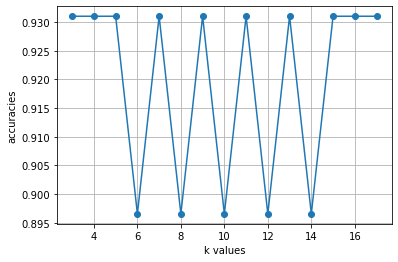

In [94]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('accuracies')
plt.grid()

In [95]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier = classifier.fit(X_train,y_train)
y_pred_kNN = classifier.predict(X_test)

In [96]:
accuracy_score(y_test,y_pred_kNN)

0.9310344827586207

In [97]:
confusion_matrix(y_test,y_pred_kNN)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

In [98]:
# According to the accuracy_score i've got kNN , random forest & logistic regression giving best results